# Density Based Clustering

Density based clustering does not assumes an specific shape for the data, let's see wen we use data that does not fit into spherical clusters, for example an image

In [1]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')


We will transform the image into a dataset including the coordinates of the pixels and their RGB values

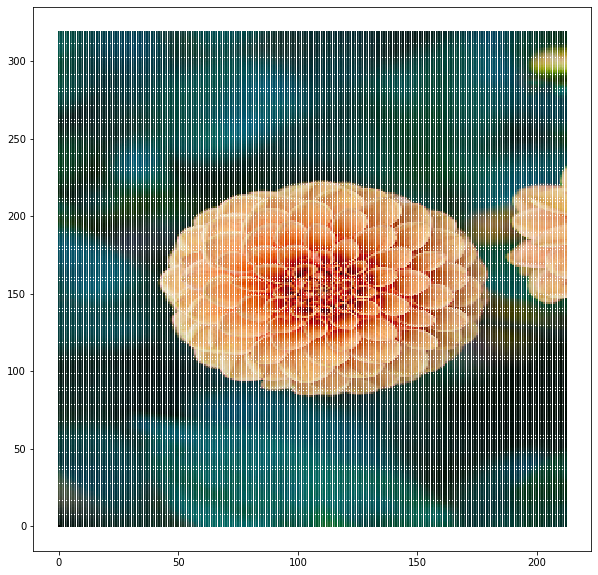

In [2]:
colors = 'rgbymc'
# you can use 'flower' or 'china' images
flower = load_sample_image('flower.jpg')
mdata = np.zeros((int(flower.shape[0]*flower.shape[1]/4.0), flower.shape[2]+2))
cc=0
for i in range(0,flower.shape[0]-1,2):
    for j in range(0,flower.shape[1]-1,2):
        mdata[cc][0] = i/2
        mdata[cc][1] = j/2
        for k in range(flower.shape[2]):
            mdata[cc][2+k] = flower[i, j, k]
        cc += 1
plt.figure(figsize=(10,10))
plt.scatter(mdata[:, 0], mdata[:, 1], c=mdata[:, 2:]/255.0, s=2, marker='+');

This is what happens using K-means looking for different number of cluster using the coordinates and the color

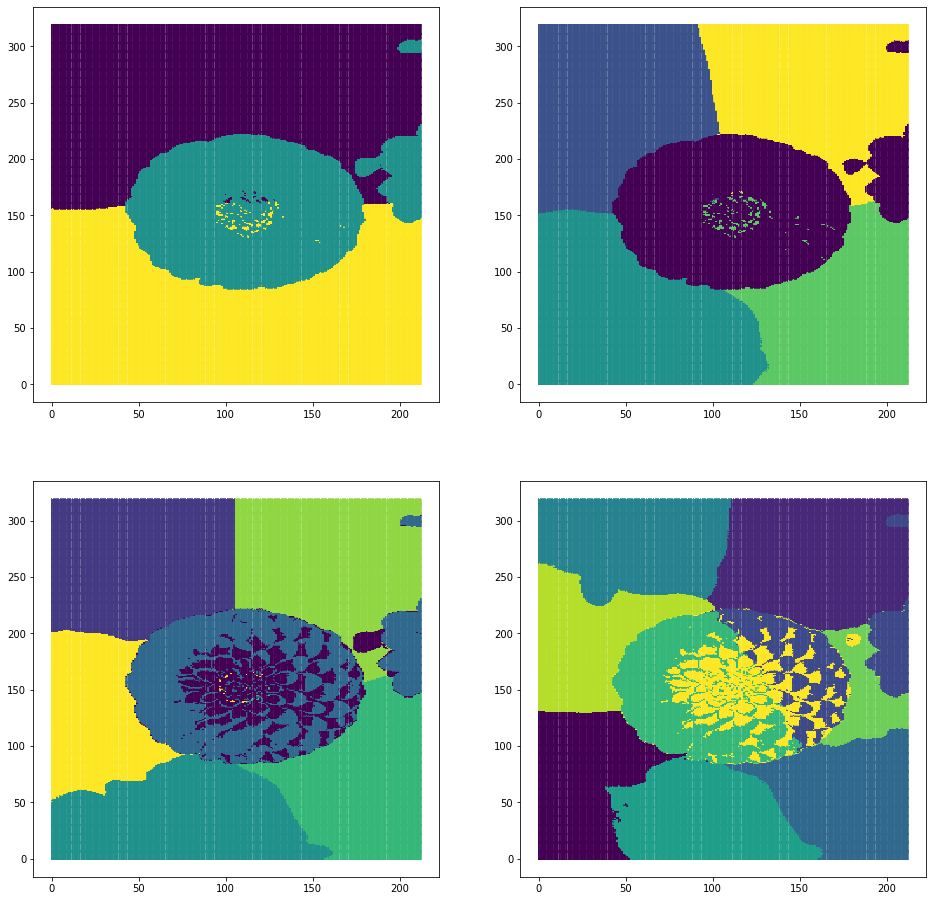

In [3]:
lnc=[3,5,7,10]
fig = plt.figure(figsize=(16,16))
for i, nc in enumerate(lnc):
    km = KMeans(n_clusters=nc, n_jobs=-1)
    labels = km.fit_predict(mdata)
    ax = fig.add_subplot(2,2,i+1)
    plt.scatter(mdata[:, 0], mdata[:, 1], c=np.array(labels)/len(np.unique(labels)), s=2, marker='+');

Even when we do not have actual spherical clusters we can find similar pixels around regions that make sense for K-means

Now we will cluster only the colors (we are applying vector quantization to the colors palette). You can play with the number of clusters to see how the cluster colors get closer to the original colors.

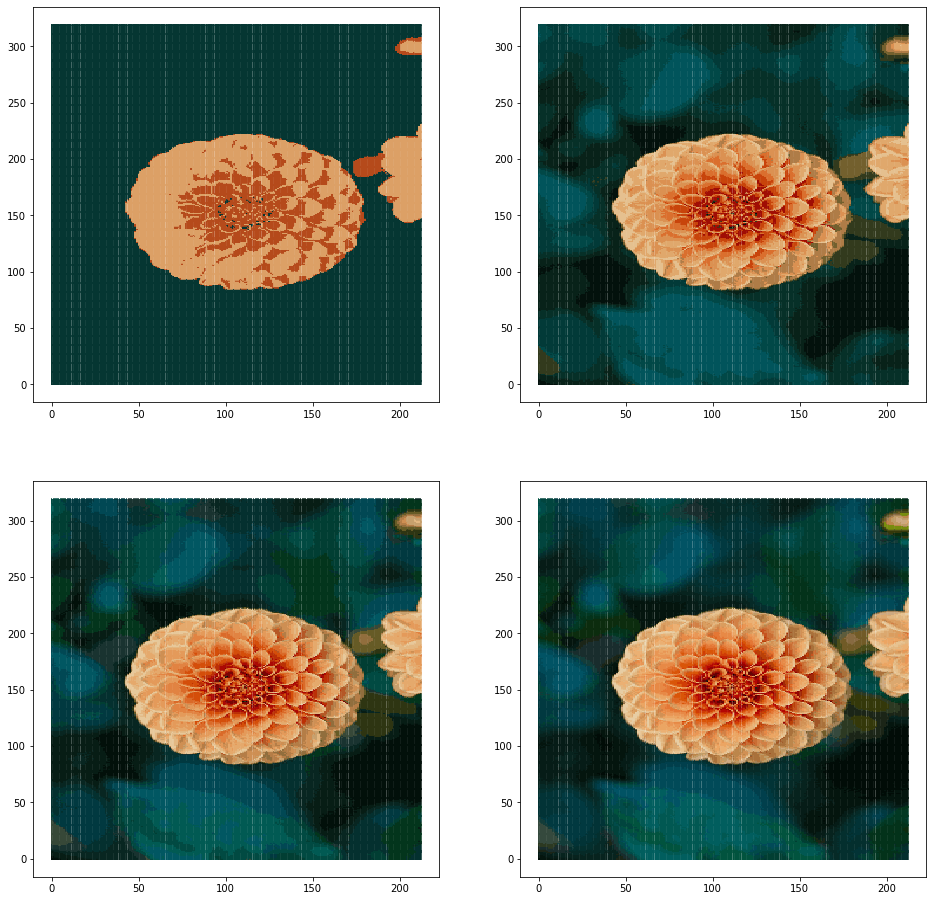

In [4]:
lnc=[3,15,30,60]
fig = plt.figure(figsize=(16,16))
for i, nc in enumerate(lnc):
    km = KMeans(n_clusters=nc)
    labels = km.fit_predict(mdata[:,2:])
    ccent = km.cluster_centers_/255.0
    lcols = [ccent[l,:] for l in labels]
    ax = fig.add_subplot(2,2,i+1)
    plt.scatter(mdata[:, 0], mdata[:, 1], c=lcols, s=2, marker='+');

Even when the number of colors in the image is large, clustering the RGB values can compress the color information of the image enough to not to appreciate the difference when the number of clusters is large enough 

For DBSCAN we will also use coordinates and colors, now to select the parameters are more complex and different values will yield very different results, so it is important to be able to visualize the clusters.

NClusters(eps=5,ms=5)=324
NClusters(eps=10,ms=10)=84
NClusters(eps=15,ms=15)=13
NClusters(eps=25,ms=25)=2


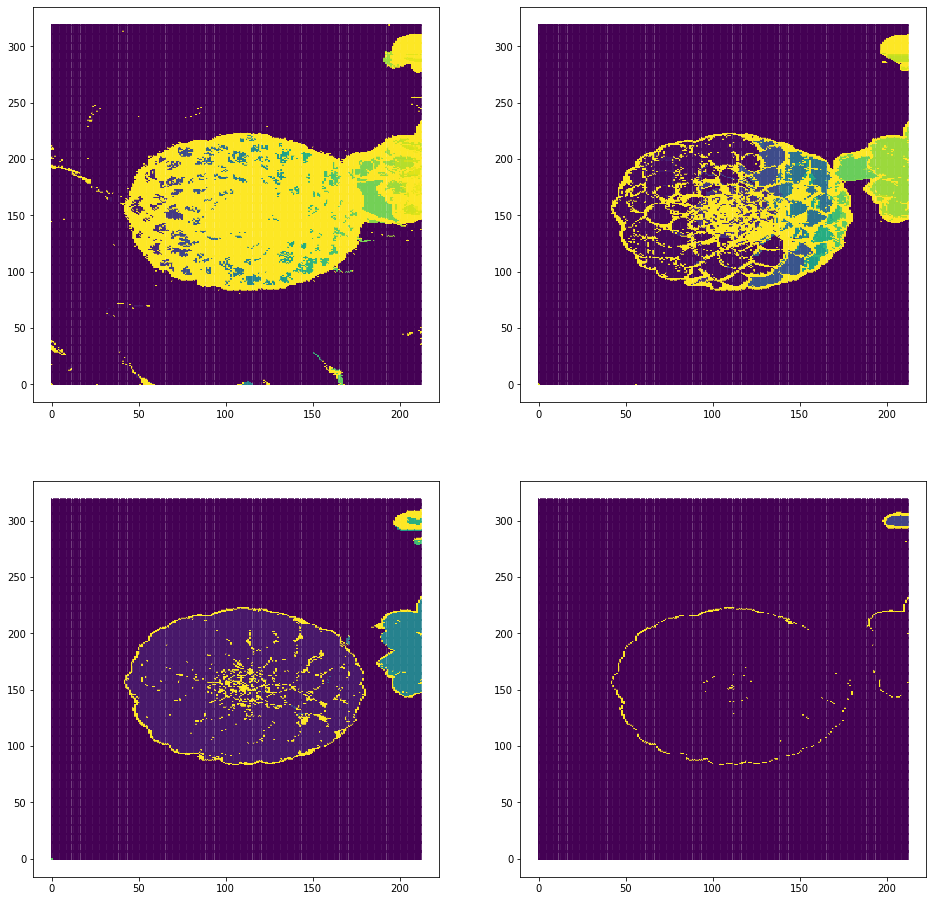

In [5]:
lpar = [(5, 5),(10, 10), (15, 15),(25, 25)]

fig = plt.figure(figsize=(16,16))
for i, (eps, ms) in enumerate(lpar):
    dbs = DBSCAN(eps=eps, min_samples=ms)
    labels = dbs.fit_predict(mdata)
    unq = len(np.unique(labels))
    print(f"NClusters(eps={eps},ms={ms})={unq-1}")
    ecolors = np.array(labels)
    ecolors[ecolors == -1] += unq+3
    ax = fig.add_subplot(2,2,i+1)
    plt.scatter(mdata[:, 0], mdata[:, 1], c=ecolors, s=2, marker='+');